In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import statistics
import math
import matplotlib.pyplot as plt
from collections import OrderedDict

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# load the dataset

In [6]:
df=pd.read_csv(r'~\SDA - bootcamp\Capstone Project Final\Dataset\BISOPROLOL_df_Cleaned.csv')

In [7]:
df.head(2)

,Unnamed: 0,ORDERING_SPECIALITY,ORDER_DATE,ORDER_DATETIME,DRUG_GENERIC_NAME,DOSE,FREQUENCY,DURATION,Type,LAST_DISPDATE,ORDER_END_DATETIME,PharmacyStatus,DSP_Qty,Priority,PhReviewStatus,OrderQty,Year,Month,ORDER_Month,ORDER_Year,DRUG_TYPE,DSP_Qty_Net,CONCENTRSATION,DSP_Qty_Cleaned
0,0,Cardiology,2021-02-08,2/8/2021 10:41,"BISOPROLOL - BITROL, 5mg,Coated Tablet,Oral [3...",2.5,daily,For 60 Day(s),Out Patient,2021-02-09,4/9/2021 10:40,Collected,30.0,Normal,Needs Review,150.0,2021.0,2.0,2,2021,BISOPROLOL,30.0,5.0,30.0
1,1,Cardiology,2020-12-31,12/31/2020 5:13,"BISOPROLOL - BITROL, 5mg,Coated Tablet,Oral [3...",2.5,daily,For 30 Day(s),Emergency,2020-12-31,1/30/2021 5:11,Collected,30.0,Discharge Meds,Approved,75.0,2020.0,12.0,12,2020,BISOPROLOL,30.0,5.0,15.0


# Smoothing by bin boundary

In [8]:
#Group by date
df= df.groupby(['ORDER_DATE'])['DSP_Qty_Cleaned'].sum().reset_index()

In [9]:
df.head(2)

,ORDER_DATE,DSP_Qty_Cleaned
0,2019-07-01,7118.5
1,2019-07-02,10527.0


In [10]:
df=df.sort_values('DSP_Qty_Cleaned')

In [11]:
df.head()

,ORDER_DATE,DSP_Qty_Cleaned
48,2019-08-18,3.5
481,2020-10-24,3.5
271,2020-03-28,7.0
838,2021-10-16,30.0
313,2020-05-09,37.0


In [12]:
l=df['DSP_Qty_Cleaned'].tolist()

In [13]:
x = l #data
bi = 30 #number of bins
  
# X_dict will store the data in sorted order
X_dict = OrderedDict()
# x_old will store the original data
x_old ={}
# x_new will store the data after binning
x_new ={}
  
  
for i in range(len(x)):
    X_dict[i]= x[i]
    x_old[i]= x[i]

# list of lists(bins)
binn =[]
# a variable to find the mean of each bin
avrg =[]
  
i = 0
k = 0
num_of_data_in_each_bin = int(math.ceil(len(x)/bi))
  
for g, h in X_dict.items():
    if(i<num_of_data_in_each_bin):
        avrg.append(h)
        i = i + 1
    elif(i == num_of_data_in_each_bin):
        k = k + 1
        i = 0
        binn.append([min(avrg), max(avrg)])
        avrg =[]
        avrg.append(h)
        i = i + 1
binn.append([min(avrg), max(avrg)])
  
i = 0
j = 0

for g, h in X_dict.items():
    if(i<num_of_data_in_each_bin):
        if(abs(h-binn[j][0]) >= abs(h-binn[j][1])):
            x_new[g]= binn[j][1]
            i = i + 1
        else:
            x_new[g]= binn[j][0]
            i = i + 1
    else:
        i = 0
        j = j + 1
        if(abs(h-binn[j][0]) >= abs(h-binn[j][1])):
            x_new[g]= binn[j][1]
        else:
            x_new[g]= binn[j][0]
        i = i + 1

In [14]:
binn

[[3.5, 120.0],
 [125.0, 187.0],
 [189.0, 247.5],
 [249.5, 315.0],
 [315.0, 375.0],
 [375.0, 432.0],
 [434.0, 540.0],
 [570.0, 739.0],
 [743.5, 1143.0],
 [1160.0, 2159.0],
 [2160.0, 2826.5],
 [2829.5, 3487.0],
 [3494.0, 3903.5],
 [3930.0, 4355.0],
 [4358.0, 4593.0],
 [4611.0, 4968.75],
 [4998.0, 5329.0],
 [5340.0, 5645.0],
 [5669.0, 5946.0],
 [5976.0, 6327.0],
 [6337.0, 6624.0],
 [6637.0, 6920.0],
 [6925.0, 7157.0],
 [7170.0, 7552.0],
 [7552.0, 7950.0],
 [7951.0, 8451.0],
 [8472.0, 8805.0],
 [8878.0, 9633.0],
 [9656.0, 10662.5],
 [10797.5, 13228.0]]

In [15]:
se = pd.Series(x_new)
df['bin_col'] = se.values

In [16]:
df.head()

,ORDER_DATE,DSP_Qty_Cleaned,bin_col
48,2019-08-18,3.5,3.5
481,2020-10-24,3.5,3.5
271,2020-03-28,7.0,3.5
838,2021-10-16,30.0,3.5
313,2020-05-09,37.0,3.5


In [17]:
del df['DSP_Qty_Cleaned']
df=df.sort_values('ORDER_DATE')
df = df.rename(columns={'bin_col': 'DSP_Qty_Cleaned'})

In [18]:
df.head()

,ORDER_DATE,DSP_Qty_Cleaned
0,2019-07-01,7157.0
1,2019-07-02,10662.5
2,2019-07-03,6920.0
3,2019-07-04,8805.0
4,2019-07-05,739.0


# Feature Engineering for the date column


In [19]:
# Convert the date column type to datetime
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'], format='%Y-%m-%d')
df['ORDER_DATE'] = df['ORDER_DATE'].dt.strftime('%Y-%m-%d')

In [20]:
#Extract new features from the date column in order to make this problem as supervised learning
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])
df['dayofweek'] = df['ORDER_DATE'].dt.dayofweek#The day of the week with Monday=0, Sunday=6.
df['quarter'] = df['ORDER_DATE'].dt.quarter#The quarter of the date.
df['month'] = df['ORDER_DATE'].dt.month#The month as January=1, December=12.
df['year'] = df['ORDER_DATE'].dt.year#The year of the datetime.
df['dayofyear'] = df['ORDER_DATE'].dt.dayofyear#The ordinal day of the year.
df['dayofmonth'] = df['ORDER_DATE'].dt.day#The day of the datetime.
df['weekofyear'] = df['ORDER_DATE'].dt.weekofyear#The week ordinal of the year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [21]:
#delete unwanted column
df=df.drop(['ORDER_DATE'],axis=1)

In [22]:
#Adding the previous 7 days of the drug quantities
df['last 1day'] = df['DSP_Qty_Cleaned'].shift(1)
df['last 2day'] = df['DSP_Qty_Cleaned'].shift(2)
df['last 3day'] = df['DSP_Qty_Cleaned'].shift(3)
df['last 4day'] = df['DSP_Qty_Cleaned'].shift(4)
df['last 5day'] = df['DSP_Qty_Cleaned'].shift(5)
df['last 6day'] = df['DSP_Qty_Cleaned'].shift(6)
df['last 7day'] = df['DSP_Qty_Cleaned'].shift(7)

In [23]:
#Rolling Window 
df['rolling_mean'] = df['DSP_Qty_Cleaned'].rolling(window=7).mean()
df=df.dropna()

In [24]:
df.head(2)

,DSP_Qty_Cleaned,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,last 1day,last 2day,last 3day,last 4day,last 5day,last 6day,last 7day,rolling_mean
7,6337.0,0,3,7,2019,189,8,28,9656.0,125.0,739.0,8805.0,6920.0,10662.5,7157.0,6177.785714
8,8472.0,1,3,7,2019,190,9,28,6337.0,9656.0,125.0,739.0,8805.0,6920.0,10662.5,5864.857143


# split the dataset

In [25]:
df=df.dropna()

In [26]:
#split the data 2019-2020 for training
df_train=df[df['year']<2021]
X_train=df_train.drop(['DSP_Qty_Cleaned'],axis=1)
y_train=df_train['DSP_Qty_Cleaned']

In [27]:
#split the data 2021 for test
df_test=df[df['year']>=2021]
X_test=df_test.drop(['DSP_Qty_Cleaned'],axis=1)
y_test=df_test['DSP_Qty_Cleaned']

# Multi-layer Perceptron Regression model

In [ ]:
#Multi-layer Perceptron Regression model
reg = MLPRegressor()
reg.fit(X_train, y_train)  
y_pred = reg.predict(X_test)

In [29]:
#performance metrics
print('R2 Score |{}'.format(R2(y_test, y_pred)))
print('Mean Absolute Error  |{}'.format(MAE(y_test, y_pred)))
print('Mean Squared Error  |{}'.format(MSE(y_test, y_pred)))
print('Root Mean Squared Error  |{}'.format(MSE(y_test, y_pred,squared=False)))

R2 Score |0.9061744012227053
Mean Absolute Error  |697.9769719430707
Mean Squared Error  |874163.0264570288
Root Mean Squared Error  |934.9668584805714


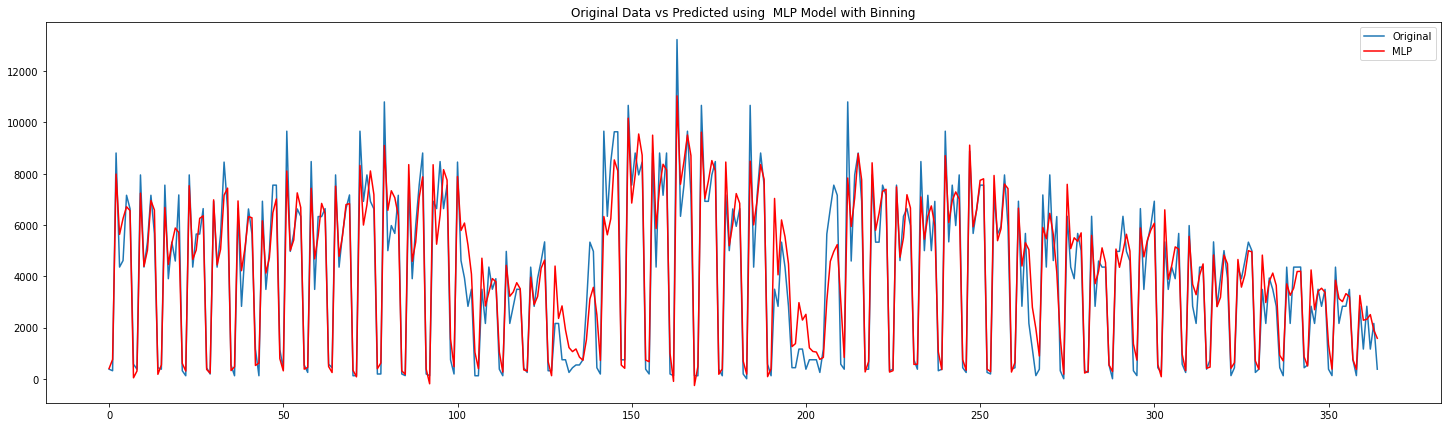

In [30]:
#plot
fig = plt.figure()
fig.set_figwidth(25)
fig.set_figheight(7)
plt.plot(y_test.values, label='Original')
plt.plot(y_pred, color='red', label='MLP')
plt.title("Original Data vs Predicted using  MLP Model with Binning")
plt.legend()

# GridSearch

In [31]:
#hidden_layer_sizes=(65,65,65),activation="relu" ,random_state=1, max_iter=2000
mlp= MLPRegressor(max_iter=2000)
params = {'hidden_layer_sizes': [(50,50,50),(65,65,65)],
          'activation': ['relu'],
          'alpha': [0.0001, 0.05]}
grid = GridSearchCV(mlp, params)
grid.fit(X_train, y_train)
gridcv_mlp = grid.best_estimator_

In [ ]:
gridcv_mlp

In [33]:
#performance metrics
y_pred_g=gridcv_mlp.predict(X_test)
print('R2 Score |{}'.format(R2(y_test, y_pred_g)))
print('Mean Absolute Error  |{}'.format(MAE(y_test, y_pred_g)))
print('Mean Squared Error  |{}'.format(MSE(y_test, y_pred_g)))
print('Root Mean Squared Error  |{}'.format(MSE(y_test, y_pred_g,squared=False)))

R2 Score |0.9772209391246052
Mean Absolute Error  |349.8920008706987
Mean Squared Error  |212230.0635879643
Root Mean Squared Error  |460.68434267724393


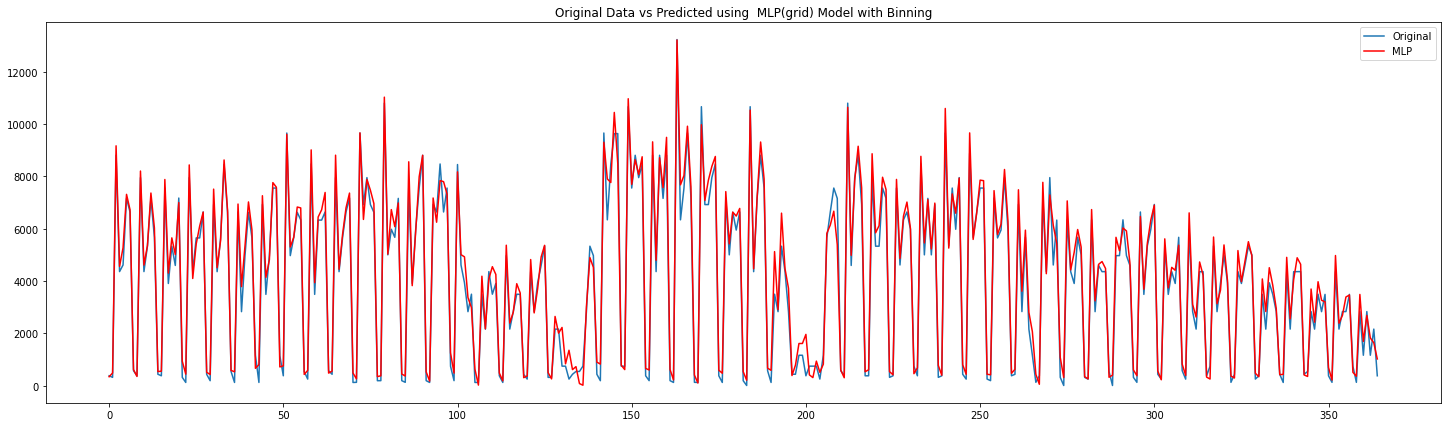

In [34]:
#plot
fig = plt.figure()
fig.set_figwidth(25)
fig.set_figheight(7)
plt.plot(y_test.values, label='Original')
plt.plot(y_pred_g, color='red', label='MLP')
plt.title("Original Data vs Predicted using  MLP(grid) Model with Binning")
plt.legend()

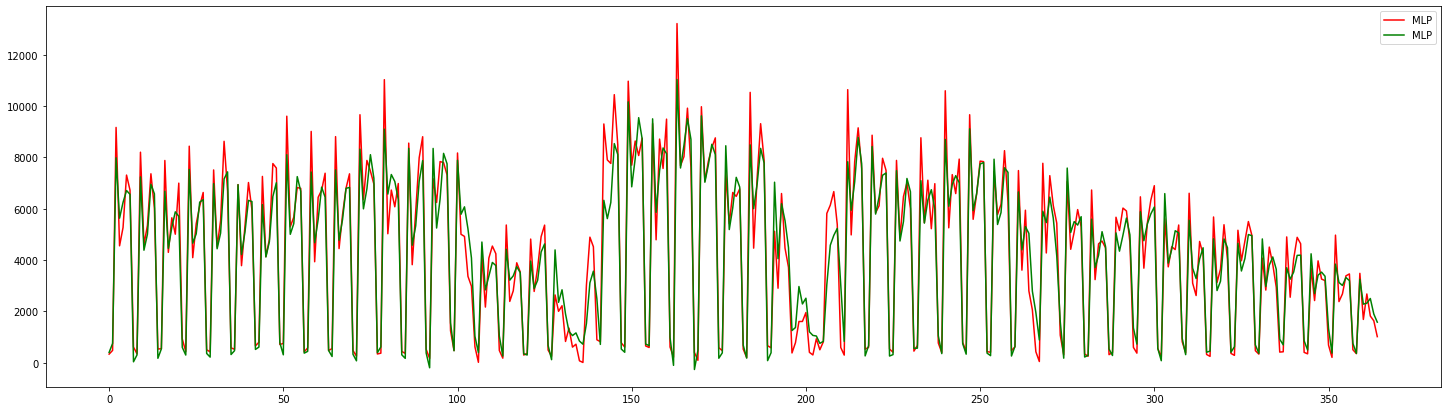

In [41]:
#plot
fig = plt.figure()
fig.set_figwidth(25)
fig.set_figheight(7)

plt.plot(y_pred_g, color='red', label='MLP')
plt.plot(y_pred, color='green', label='MLP')
plt.legend()

In [36]:
model_r=X_test
model_r['quantities']=y_test.to_frame()
model_r['prediction']=y_pred_g

In [37]:
model_r['error rate']=model_r['quantities']/model_r['prediction']

In [38]:
model_r['quantities_round100']=(model_r['quantities']//100*100+100).astype(int)
model_r['prediction_round100']=(model_r['prediction']//100*100+100).astype(int)

In [39]:
model_r

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,last 1day,last 2day,last 3day,last 4day,last 5day,last 6day,last 7day,rolling_mean,quantities,prediction,error rate,quantities_round100,prediction_round100
550,4,1,1,2021,1,1,53,5976.0,6637.0,7552.0,6624.0,9633.0,120.0,249.5,5273.857143,375.0,338.793374,1.106869,400,400
551,5,1,1,2021,2,2,53,375.0,5976.0,6637.0,7552.0,6624.0,9633.0,120.0,5301.714286,315.0,482.292898,0.653130,400,500
552,6,1,1,2021,3,3,53,315.0,375.0,5976.0,6637.0,7552.0,6624.0,9633.0,5183.428571,8805.0,9166.519394,0.960561,8900,9200
553,0,1,1,2021,4,4,1,8805.0,315.0,375.0,5976.0,6637.0,7552.0,6624.0,4859.714286,4358.0,4556.328210,0.956472,4400,4600
554,1,1,1,2021,5,5,1,4358.0,8805.0,315.0,375.0,5976.0,6637.0,7552.0,4439.571429,4611.0,5268.423173,0.875214,4700,5300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0,4,12,2021,361,27,52,2829.5,125.0,743.5,3487.0,2829.5,2829.5,2160.0,2000.571429,1160.0,1689.401074,0.686634,1200,1700
911,1,4,12,2021,362,28,52,1160.0,2829.5,125.0,743.5,3487.0,2829.5,2829.5,2000.571429,2829.5,2680.781034,1.055476,2900,2700
912,2,4,12,2021,363,29,52,2829.5,1160.0,2829.5,125.0,743.5,3487.0,2829.5,1762.071429,1160.0,1821.759350,0.636747,1200,1900
913,3,4,12,2021,364,30,52,1160.0,2829.5,1160.0,2829.5,125.0,743.5,3487.0,1572.500000,2160.0,1635.657141,1.320570,2200,1700


In [40]:
model_r.to_csv(r'~\SDA - bootcamp\Capstone Project Final\Dataset\model_result.csv')